In [1]:
# !git fetch
# !git pull

In [2]:
# !pip3 install /Engineering/Milestone3/VirtualMachine/Orchestrator/sail/

In [3]:
from sail.core import VMSetup, registersafeobj,login,connect,pushsafeobj,querydata,get_fns, shap_private
from sail.data import RemoteDataFrame, Utils
from sail.algo import fdxgb
import time
start_time = time.time()

In [4]:
import json, requests
soPath = "/Engineering/Milestone3/EndPointTools/SafeObjectEditor/KPMG/safeobjects"
contractdict = [{"DigitalContractGuid":"{3ED8F4ED-A6BD-49DC-89C0-1A124D655F21}"}, {"DigitalContractGuid":"{358729A6-126B-4651-82E2-BE3F1CAA2709}"}]
backendIP = "52.150.26.47"

registersafeobj(soPath)
print("[P]safe objects registered")

[P]safe objects registered


In [5]:
eosb = login("r@r.r", "SailPassword@123", 6200, backendIP)
print("[P]login success")
print(eosb)

[P]login success
5iEQAhtloSNKD2bwpNnSZNONae3nNRkBT6tGTBAHsbv28GAYreccz+4CRlSqre5MqqWRmw0DAABnVKurv41xpmLnkgewsyXoxXEHH0kw9FHXmOBJ3mSqOTGaV72ZY2RUFisE7wfL55I640i8kcDJcMgCjdquD4L47JCBmMOVGVzR1JBFzF6z3m1525/5O0W1ULiNiQy/t9qlc5EIbI4WA19BEcENlg4urRPOedOGIx0svDyJUhaQGwn3vZlh7MqIltEv9x2QKbuEzw7Is8KtQUk638L/KdTfO/607MKhNZ/xsj8XY7d8X2YMolQwa2HKriYu09c9d7mXnXjIZtGz9jz+vS091uehCDK+0qS+vOlySfueAoM2rDfmXxPORYd4SPzKGSpC2ubNB5Nx8eAjIN5xZiaObN8ZDWXFHf6xBl2ADlwvY0QTXb5+5b2HvTLNc4IvbESuC7nyHLWqDt5V7cVwnSKiQXVuP3DPBZVVWUhfDnnonIdWximppZ3qybuKWk7dguczTs1uhEda7H9/XqguAhCeJ12p9XTZ7USau1vRlqdJ/VqREKFgnWl2mGN9exPOEAp6eqX/PP+hlWpkOvnrRyxpvDx1YOL9fzYKBMsu2+R8nMj9XkyxkRTNXzOG5s9PyLThz98Ujr2VtAzyBznc9UCdZKMPFkkKYqShEWNepcs/RKoChz/8LkZm8odTnQXCl5l5KTFOAS/oErCo1mXt10xDRaFXLY/wspxVPgU7qj7Lu/hAJ15IuzQca4pbdEoZVo1TYs4vWtPbLjkHFi+W0KNOAHTbFuW6nQ/TfY2Y0jn8DKEXbKBoX1kE9SinCLZzgesn1wfKiH2Ph/obFnDmB6fYg2e2VZsZVcY5pf59dYjRdOKnlC2uopjNqISUqUVCl9l/Bn6o3fseyPu67IiEL9ThhtZUajqyReedGDU2PE9T8rDID/1gRPfXJDCwDDR3oaAUK74tnkDbym5mSD2

In [6]:
url = "https://"+backendIP+":6200/SAIL/VirtualMachineManager/GetRunningVMsIpAdresses?Eosb="+eosb

payloads = []
for item in contractdict:
    temp = json.dumps(item)
    payloads.append(temp)

headers = {
    'Content-Type': 'application/json'
}

ips = []
for payload in payloads:
    print(payload)
    response = requests.request("GET", url, headers=headers, data=payload, verify=False)
    response = response.json()
    print(response)
    for key in response['VirtualMachines']:
        ips.append(response['VirtualMachines'][key])
        print(ips)

{"DigitalContractGuid": "{3ED8F4ED-A6BD-49DC-89C0-1A124D655F21}"}


/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '52.150.26.47'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


{'Status': 200.0, 'VirtualMachines': {'DE782763C12A447D97A35FC2F874F377': '20.121.11.230'}}
['20.121.11.230']
{"DigitalContractGuid": "{358729A6-126B-4651-82E2-BE3F1CAA2709}"}
{'Status': 200.0, 'VirtualMachines': {'A573FABF790A477F80606C8DE66DB3BC': '20.121.11.168'}}
['20.121.11.230', '20.121.11.168']


/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '52.150.26.47'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [7]:
vmids = []
for ip in ips:
    vmid = connect(ip, 3500)
    vmids.append(vmid)
print("[P]virtual machine connection to ip: {0} success".format(ip), flush=True)
    
fns = get_fns()
for vm in vmids:
    for key in fns:
        pushsafeobj(vm, fns[key])
print("[P]safe object pushed to virtual machines" , flush=True)

table = []
for vm in vmids:
    tableid = querydata(vm)
    table.append(tableid)
print("[P]obtain table ids", flush=True)

[P]virtual machine connection to ip: 20.121.11.168 success
[P]safe object pushed to virtual machines
[P]obtain table ids


In [8]:
fns

{'getitem': 'F11C49327A9244A5AEE568B531C6A957',
 'getattr': '9C4019584DB04B1A9BF05EC91836BCB0',
 'setitem': 'A04E4CC9E3BC4A7B9AFAB6CB3E040FAC',
 'iter': 'CC8B5A66C10F47A1A977E2BE2B522768',
 'next': '6D48AC3C3245411992E65E5FF5B90DDB',
 'rdf_describe': '18F2566E7FF34D77A7DE668DD220CEFD',
 'rdf_drop': '9A04D50B403C4716A79CABEF1F90D832',
 'rdf_dropna': '039181877F8A492A86A4BD996D0AD4E2',
 'rdf_merge': '8C938D7D313A49C09509D6A43AAFD096',
 'rdf_groupby': '3E3716FCA7DE4ABEB8A3FAB4DA14EA9D',
 'rdf_query': 'BF18C294BCCC4B9C94624C79D2506CCC',
 'rdf_sort_values': '10DCB6636C8A4832AD6CE7BCDB1F9983',
 'rdf_set_index': '09EE6479EE97461DBC4E44D95D77235B',
 'rdf_reset_index': 'F408E02C932D47C49BC5DC640C108AEB',
 'rdf_label_encode': '56D864CD0B81459CB0540E364BB49D6F',
 'groupby_agg': 'CEFAABE1879741269037050B25A5CCFD',
 'groupby_diff': '9604982079924320B6C7B6DCA27CFC6C',
 'groupby_cumsum': 'AB04C77FA5DD4B1B8AAD2867F44BC886',
 'groupby_first': 'FF2156013B9A483F9FC8F0DB27E3B74D',
 'series_add': 'B13E83BD

In [9]:
table

[{'Telco Split 1': '5944BC32A62E1140A18D45C83ADE6743'},
 {'Telco Split 2': '536DE55B26CDF64ABBB96D4792486A65'}]

In [10]:
mid_time = time.time()


u1 = Utils(vmids[0], fns)
u2 = Utils(vmids[1], fns)
df1 = u1.read_csv(table[0]['Telco Split 1'])
df2 = u2.read_csv(table[1]['Telco Split 2'])
dfs = [df1, df2]

print(time.time() - mid_time)

8.01010799407959


In [11]:
dfs

['{566BA4E4-F2D9-4B6E-9A88-0553F39E761C}.5C37473C6D3443F49C03CAF0D746B997',
 '{8ECC0D90-8057-4CB5-B496-C3F20AFA6B2C}.5C37473C6D3443F49C03CAF0D746B997']

In [12]:
n=2
data1 = RemoteDataFrame(vmids[0], df1, fns)
data2 = RemoteDataFrame(vmids[1], df2, fns)
data = [data1, data2]

In [13]:
data

In [14]:
dtypes = data1.dtypes
type_dict = dict(dtypes)
cate_labels = [key for key in type_dict if type_dict[key] in ['bool', 'object']]
cate_labels.remove('phone number')

In [15]:
cols = []
cols.append(data1.columns)
cols.append(data2.columns)

In [16]:
data1.index

RangeIndex(start=0, stop=1665, step=1)

In [17]:
y=[]
X=[]
n=2
for i in range(n):
    if 'phone number' in cols[i]:
        data[i].data_id = data[i].drop('phone number', axis = 1)
    data[i].data_id = data[i].label_encode(cate_labels)
    y.append(data[i]['churn'])
    X.append(data[i].drop('churn', axis = 1))

In [18]:
cols[0]

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [19]:
dim = len(cols[0])-2
fdxgbmod = fdxgb(vmids, params={'max_depth': 8 }, feature_num = dim)

In [20]:
y_new = []
for item in y:
    y_new.append(item.data_id)
y=y_new
y

['{71537909-6FC7-4A40-AC83-C7DBB2262733}.048E16B349F8450694B1B30E0E49E6CE',
 '{891E0A1D-8941-44A0-9B92-69902E2F59A6}.048E16B349F8450694B1B30E0E49E6CE']

In [21]:
mid_time = time.time()

model = fdxgbmod.fit(X,y)

print(time.time() - mid_time)

all_hashes has len 71
all_hashes has len 71
Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
129.10230135917664


In [22]:
mid_time = time.time()
results =  fdxgbmod.aucpr_score(model, X, y)
print(time.time() - mid_time)

4.018806219100952


In [23]:
results

[[array([0.23161361, 0.23076923, 0.2310231 , 0.23127753, 0.23153252,
         0.23178808, 0.2320442 , 0.23230088, 0.23255814, 0.23281596,
         0.23307436, 0.23333333, 0.23359288, 0.23385301, 0.23411371,
         0.234375  , 0.23463687, 0.23489933, 0.23516237, 0.23542601,
         0.23569024, 0.23595506, 0.23622047, 0.23648649, 0.2367531 ,
         0.23702032, 0.23728814, 0.23755656, 0.23669309, 0.23696145,
         0.23723042, 0.2375    , 0.23777019, 0.238041  , 0.23831243,
         0.23858447, 0.23885714, 0.23913043, 0.23940435, 0.2396789 ,
         0.23995408, 0.24022989, 0.24050633, 0.24078341, 0.24106113,
         0.24133949, 0.2416185 , 0.24189815, 0.24217845, 0.2424594 ,
         0.242741  , 0.24302326, 0.24330617, 0.24358974, 0.24387398,
         0.24415888, 0.24444444, 0.24473068, 0.24501758, 0.24530516,
         0.24559342, 0.24588235, 0.24617197, 0.24646226, 0.24675325,
         0.24704492, 0.24733728, 0.24763033, 0.24792408, 0.24821853,
         0.24851367, 0.24880952, 0

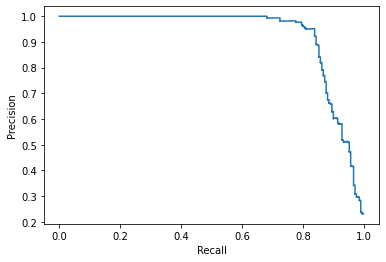

In [24]:
precision = results[0][0]
recall = results[0][1]
import numpy as np
#precision = np.append(precision, [1])
#print(precision)
#print(recall)
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

In [25]:
pred = fdxgbmod.predict(X)

In [26]:
len(pred[1])

1666

22.054675817489624


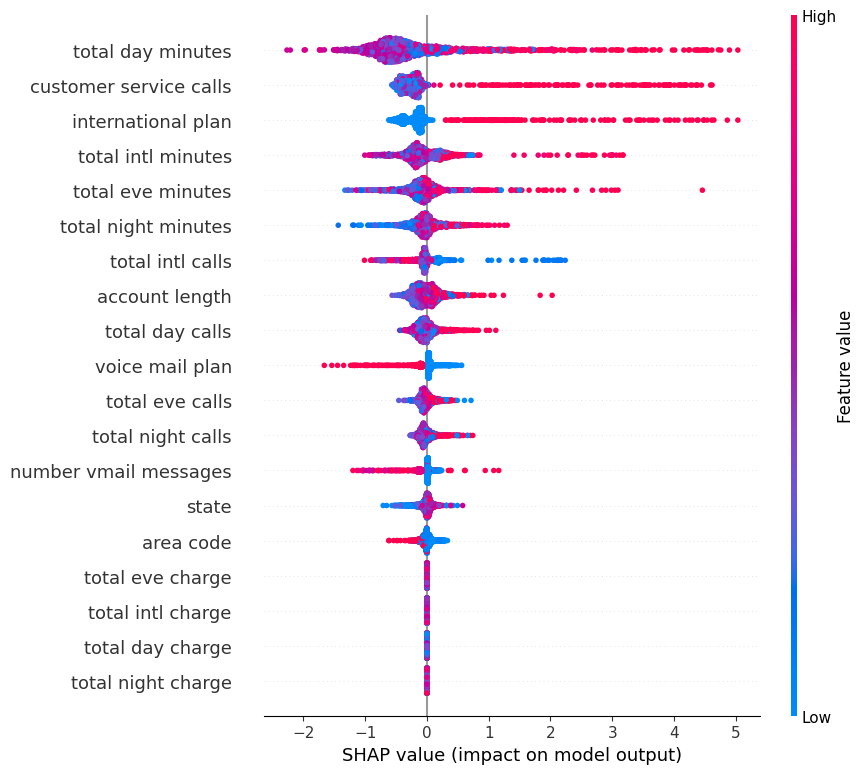

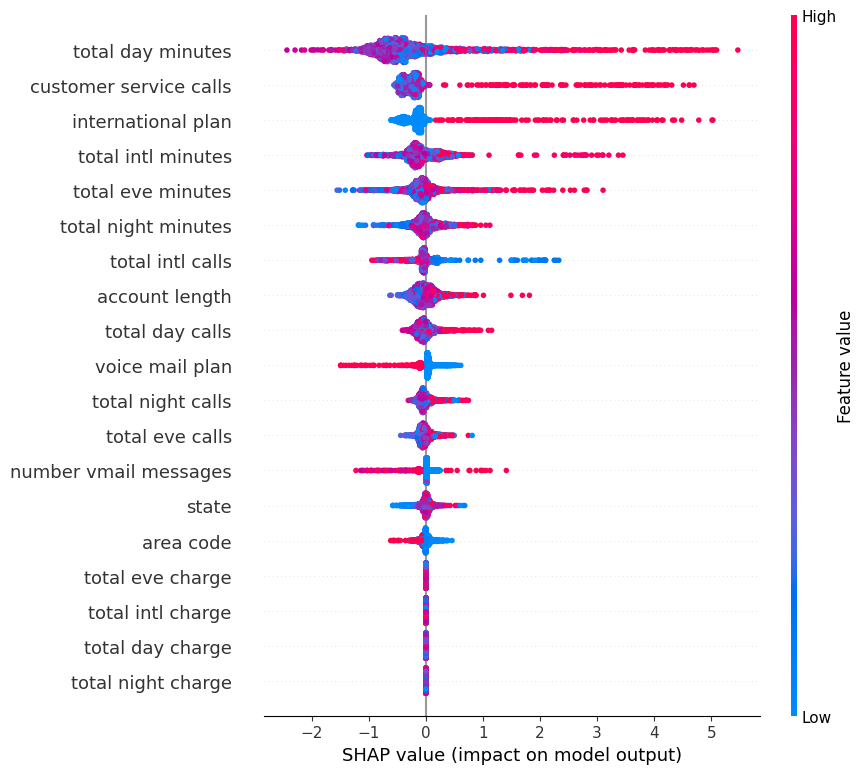

In [27]:
mid_time = time.time()

fdxgbmod.model = model
fdxgbmod.shap(X)

print(time.time() - mid_time)

In [28]:
explanation_values, explanation_base_values, expected_value, = shap_private(vmids[0], model, X[0], fns)

['{DB79A1D6-EF65-4651-AD66-95FDA865E0E3}']


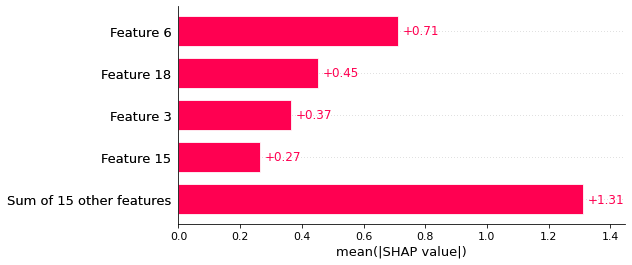

None


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


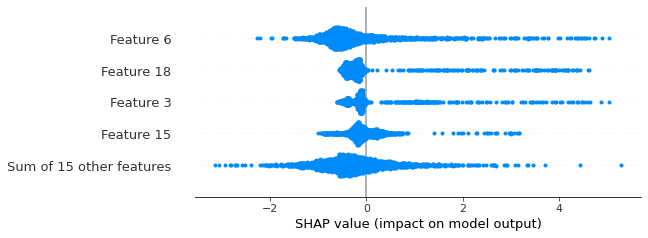

None


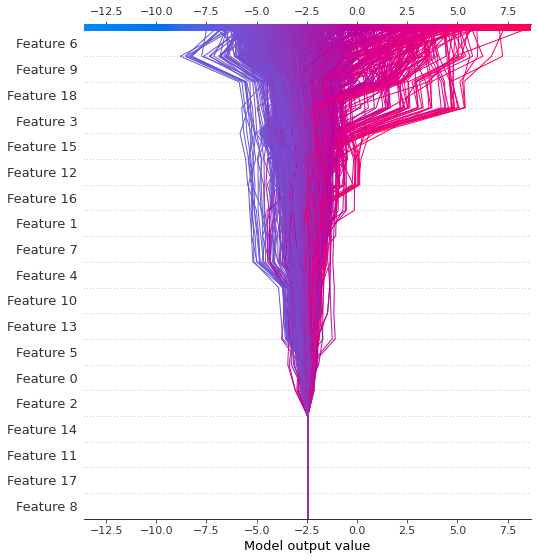

None


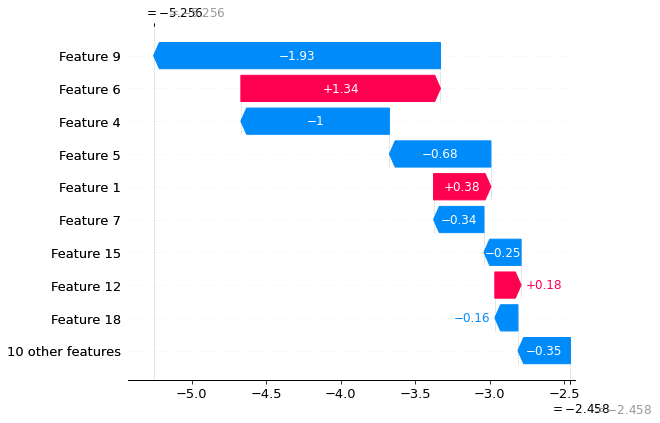

None


In [29]:
import shap

explanation = shap.Explanation(explanation_values, base_values=explanation_base_values)
print(shap.plots.bar(explanation, max_display=5))
print(shap.plots.beeswarm(explanation, max_display=5))
print(shap.decision_plot(expected_value, explanation.values))
print(shap.plots._waterfall.waterfall_legacy(expected_value, explanation[0].values))

In [30]:
explanation_values

array([[-2.4200941e-02,  3.8491920e-01, -5.0491798e-03, ...,
        -2.4710156e-02,  0.0000000e+00, -1.5500689e-01],
       [ 1.8284963e-03, -2.5164342e-02, -1.4820471e-03, ...,
        -4.4417627e-02,  0.0000000e+00, -3.4158391e-01],
       [ 6.5790266e-03,  9.7071908e-02, -8.2861213e-03, ...,
        -4.5354456e-02,  0.0000000e+00, -2.6410842e-01],
       ...,
       [ 9.7732469e-02,  8.5476600e-02,  1.4508852e-01, ...,
        -1.0900305e-01,  0.0000000e+00,  2.1087034e+00],
       [ 5.7398792e-02,  5.4987705e-01,  6.4618729e-02, ...,
        -1.1632551e-01,  0.0000000e+00, -2.1702000e-01],
       [ 1.2393327e-01, -6.9370277e-02, -3.8610157e-03, ...,
         1.9549325e-01,  0.0000000e+00, -1.8252324e-01]], dtype=float32)

In [31]:
explanation_base_values

array([-2.4579585, -2.4579585, -2.4579585, ..., -2.4579585, -2.4579585,
       -2.4579585], dtype=float32)

In [32]:
expected_value

-2.4579585